In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

HairCutBatch = pd.read_csv('Second_batch_hair.csv')

In [3]:
HairCutBatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tip amount  118 non-null    int64 
 1   Time        118 non-null    int64 
 2   Day         118 non-null    object
 3   Culture     118 non-null    object
 4   Married     118 non-null    object
 5   Age         118 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 5.7+ KB


In [4]:
HairCutBatch.describe().T

,count,mean,std,min,25%,50%,75%,max
Tip amount,118.0,6.830508,5.843113,0.0,4.0,5.0,7.0,40.0
Time,118.0,13.372881,2.571363,1.0,11.0,13.0,15.0,19.0
Age,118.0,30.610169,10.920876,3.0,25.0,30.0,40.0,55.0


In [5]:
HairCutBatch.head()

,Tip amount,Time,Day,Culture,Married,Age
0,20,10,mon,P,NM,30
1,5,11,mon,W,NM,16
2,5,11,mon,E,M,40
3,3,11,Fri,M,M,40
4,6,11,Fri,W,NM,30


In [6]:
HairCutBatch.groupby('Married')['Tip amount'].mean()

Married
M     6.435897
NM    7.025316
Name: Tip amount, dtype: float64

In [8]:
HairCutBatch = HairCutBatch[HairCutBatch['Tip amount'].notnull()]

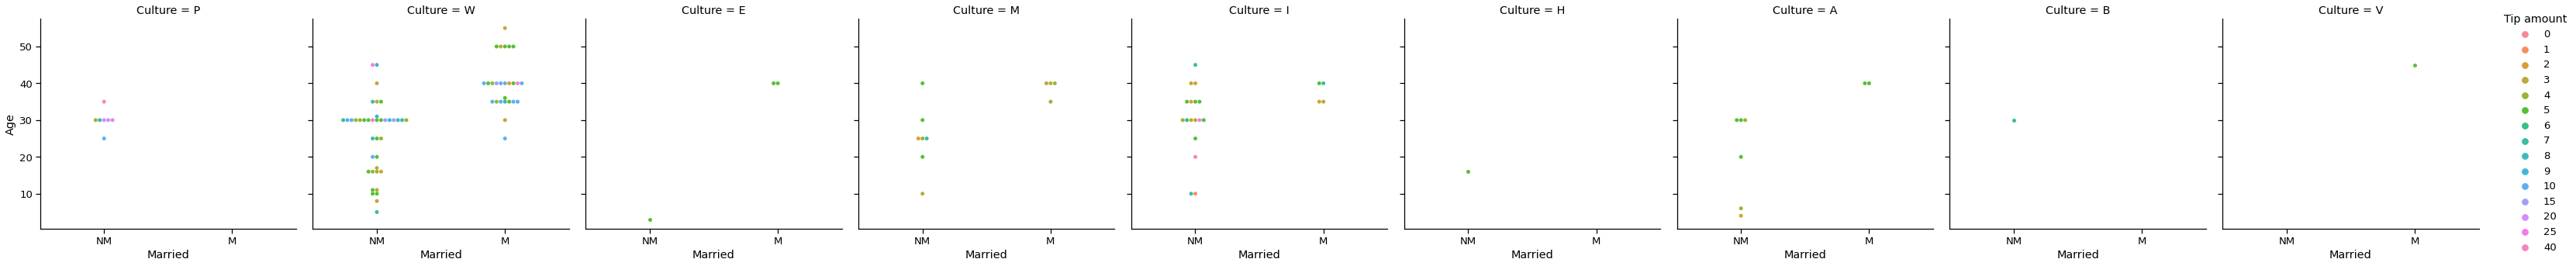

In [10]:
with sns.plotting_context('notebook',font_scale=1.2):

    ax = sns.catplot(
        x='Married',
        y='Age',
        hue='Tip amount',
        col='Culture',
        data=HairCutBatch,
        orient='v',
        kind='swarm',
    )

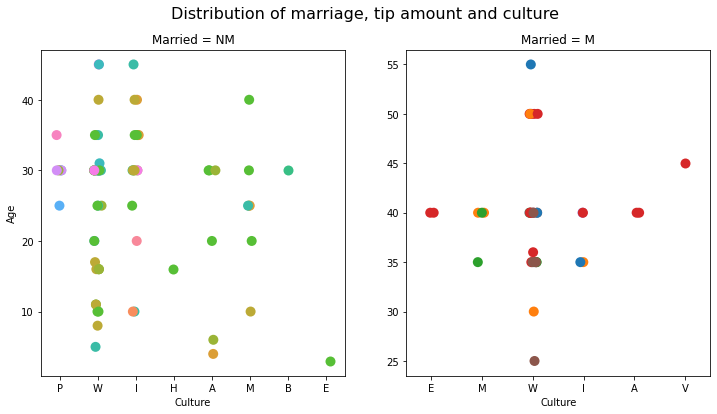

In [11]:
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=2)
plt.suptitle('Distribution of marriage, tip amount and culture', fontsize=16)

married = ["NM", "M"]
for i in range(2):
    ax[i].set_title('Married = '+married[i])
#     ax[i].set_ylim(-5,85)
    sns.stripplot(data=HairCutBatch[HairCutBatch['Married']==f'{married[i]}'],
                  x='Culture',
                  y='Age',
                  hue='Tip amount',
#                   hue_order="Age",
                  size=10,
                  ax=ax[i])

ax[1].set_ylabel(None)

ax[0].legend_.remove()
ax[1].legend_.remove()